In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as skl
import time
from IPython.display import display, clear_output
import seaborn as sns

import sklearn
from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import svm
from xgboost import XGBClassifier
from itertools import compress
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

# Multiplicative models
from sklearn.svm            import SVR
from sklearn.linear_model   import Lasso
from sklearn.linear_model   import SGDRegressor
from sklearn.linear_model   import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors      import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import svm
from xgboost import XGBClassifier
from itertools import compress
set_config(display='diagram') # Useful for display the pipeline
import missingno as msno
print("Pandas  ", pd.__version__)

Pandas   1.2.3


In [5]:
df =pd.read_csv('C:\\Users\\Win10\\Downloads\\online_shoppers_intention (1).csv')

In [7]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [8]:
df.VisitorType

0        Returning_Visitor
1        Returning_Visitor
2        Returning_Visitor
3        Returning_Visitor
4        Returning_Visitor
               ...        
12325    Returning_Visitor
12326    Returning_Visitor
12327    Returning_Visitor
12328    Returning_Visitor
12329          New_Visitor
Name: VisitorType, Length: 12330, dtype: object

## column description

In [ ]:


'''
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase
'''

In [9]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [10]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


C:\Users\Win10\anaconda3\envs\AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


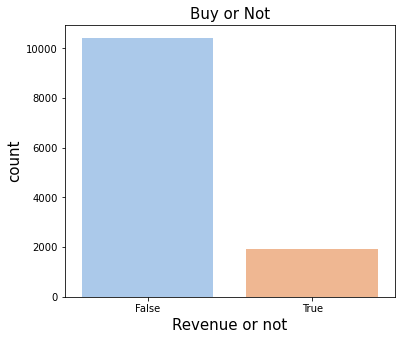

In [12]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(1, 2, 1)
sns.countplot(df['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [13]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

C:\Users\Win10\anaconda3\envs\AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


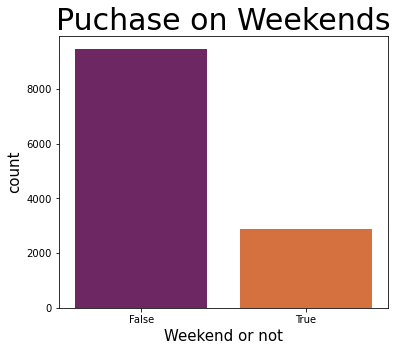

In [14]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Puchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [15]:
# checking the no. of Os's is having
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

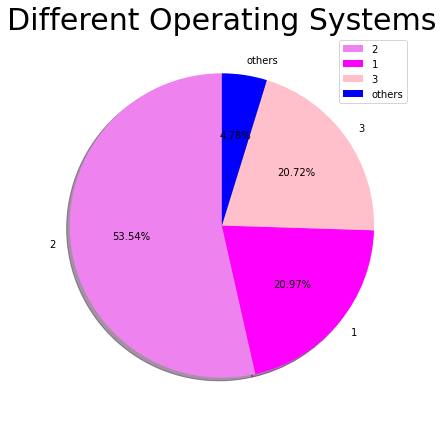

In [16]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['violet', 'magenta', 'pink', 'blue']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [17]:
#Top 3 Operating Systems are covered 95% of this dataset. So we should focus on them to increase our business

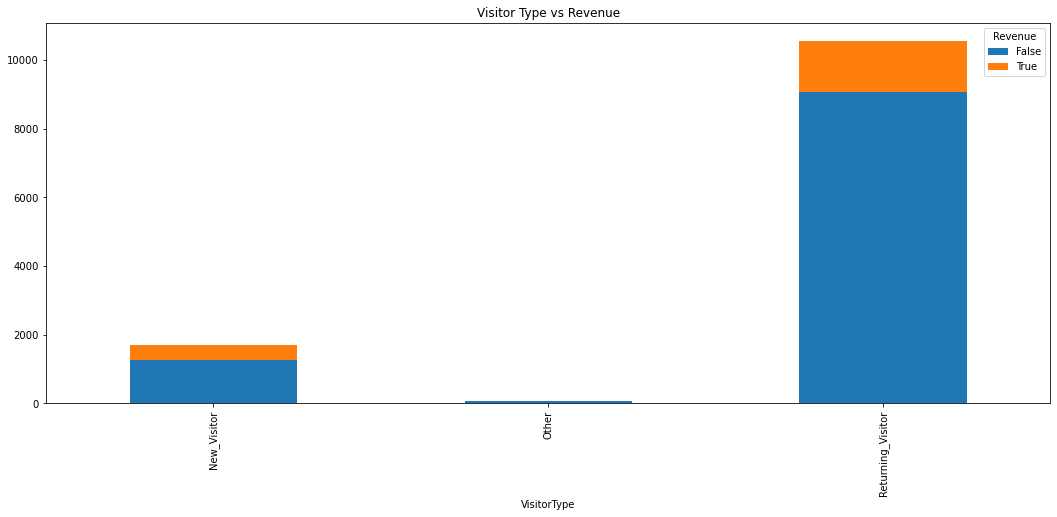

In [18]:
pd.crosstab(df['VisitorType'],df['Revenue']).plot(kind='bar',stacked=True)
plt.title('Visitor Type vs Revenue')
plt.show()

In [19]:
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

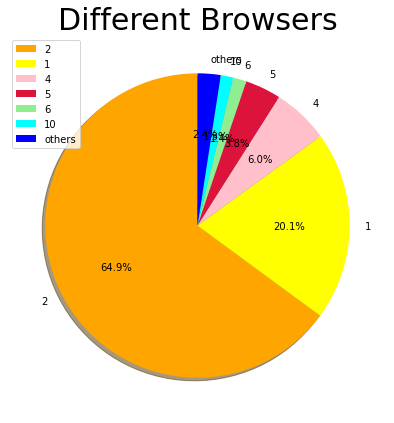

In [20]:
# Ploting a pie chart for operating systems
plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1", "4", "5", "6", "10", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.1f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Region'>

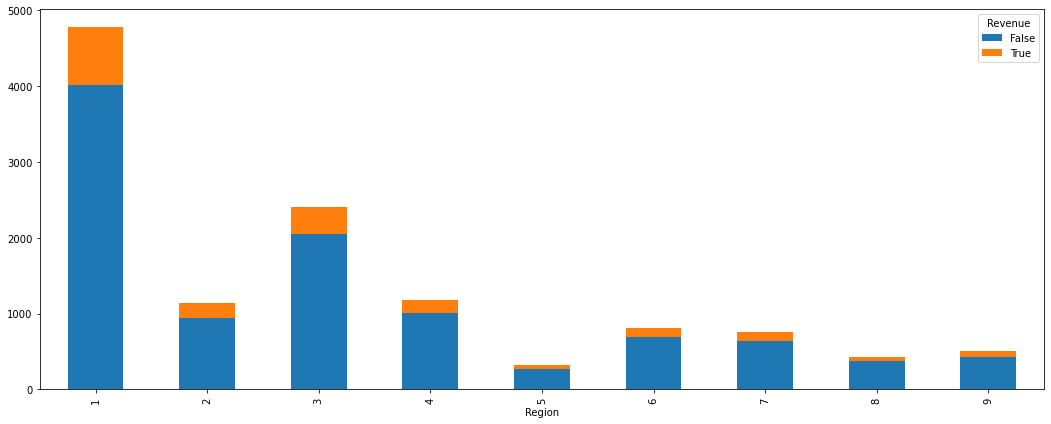

In [21]:
pd.crosstab(df['Region'],df['Revenue']).plot(kind='bar',stacked=True)

In [69]:
df.dtypes


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                       bool
Revenue                      int64
dtype: object

In [140]:
cat_cols=['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend','Revenue']

num_cols=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated ','ProductRelated_Duration','BounceRates','ExitRates ','PageValues','SpecialDay']


In [153]:
cat_cols = cat_cols[:-1]
cat_cols

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType']

In [154]:
df_dummies = pd.get_dummies(df, columns = cat_cols)

In [155]:
df_dummies.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Month_0', 'Month_1', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'Traf

In [152]:
df_dummies.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue',
       'Month_0', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13',
       'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6',
       'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'TrafficType_8',

In [145]:
X = df_dummies

In [146]:
y = df['Revenue']

In [147]:
y = y.astype(int)
y


0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int32

In [148]:
'''
cat_4_treeModels = pipeline.Pipeline(steps=[
  ('ordinal', preprocessing.OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan))
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('cat', cat_4_treeModels, cat_cols),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

display(tree_prepro)

######################################

num_4_multModels = pipeline.Pipeline(steps=[
  ('scalar', preprocessing.QuantileTransformer(n_quantiles=200, output_distribution='normal', random_state=10))
])

cat_4_multModels = pipeline.Pipeline(steps=[
  ('onehot', preprocessing.OneHotEncoder(handle_unknown="ignore"))
])

mult_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_multModels, num_cols),
    ('cat', cat_4_multModels, cat_cols),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

display(mult_prepro)
'''

'\ncat_4_treeModels = pipeline.Pipeline(steps=[\n  (\'ordinal\', preprocessing.OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan))\n])\n\ntree_prepro = compose.ColumnTransformer(transformers=[\n    (\'cat\', cat_4_treeModels, cat_cols),\n], remainder=\'drop\') # Drop other vars not specified in num_vars or cat_vars\n\ndisplay(tree_prepro)\n\n######################################\n\nnum_4_multModels = pipeline.Pipeline(steps=[\n  (\'scalar\', preprocessing.QuantileTransformer(n_quantiles=200, output_distribution=\'normal\', random_state=10))\n])\n\ncat_4_multModels = pipeline.Pipeline(steps=[\n  (\'onehot\', preprocessing.OneHotEncoder(handle_unknown="ignore"))\n])\n\nmult_prepro = compose.ColumnTransformer(transformers=[\n    (\'num\', num_4_multModels, num_cols),\n    (\'cat\', cat_4_multModels, cat_cols),\n], remainder=\'drop\') # Drop other vars not specified in num_vars or cat_vars\n\ndisplay(mult_prepro)\n'

In [149]:
''''
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(random_state=0),
  "Extra Trees":ExtraTreesClassifier(random_state=0),
  "Random Forest":RandomForestClassifier(random_state=0),
  "AdaBoost":AdaBoostClassifier(random_state=0),
  "Skl GBM":GradientBoostingClassifier(random_state=0),
  "Skl HistGBM":GradientBoostingClassifier(random_state=0),
  "XGBoost":XGBClassifier(random_state=0),
  "LightGBM":LGBMClassifier(random_state=0),
  "CatBoost":CatBoostClassifier(random_state=0)
}

mult_classifiers = {
  "SVR": SVR(),
  "Lasso": Lasso(),
  "SDG regr": SGDRegressor(),
  "Neural regr": MLPRegressor(random_state=73),
  "KNN regr": KNeighborsRegressor(n_neighbors=10),
  "Ridge": Ridge(alpha=0.6, random_state=73)
}

tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
mult_classifiers = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_classifiers.items()}

all_pipelines = {**tree_classifiers, **mult_classifiers}
tree_classifiers["LightGBM"]
'''

'\'\ntree_classifiers = {\n  "Decision Tree": DecisionTreeClassifier(random_state=0),\n  "Extra Trees":ExtraTreesClassifier(random_state=0),\n  "Random Forest":RandomForestClassifier(random_state=0),\n  "AdaBoost":AdaBoostClassifier(random_state=0),\n  "Skl GBM":GradientBoostingClassifier(random_state=0),\n  "Skl HistGBM":GradientBoostingClassifier(random_state=0),\n  "XGBoost":XGBClassifier(random_state=0),\n  "LightGBM":LGBMClassifier(random_state=0),\n  "CatBoost":CatBoostClassifier(random_state=0)\n}\n\nmult_classifiers = {\n  "SVR": SVR(),\n  "Lasso": Lasso(),\n  "SDG regr": SGDRegressor(),\n  "Neural regr": MLPRegressor(random_state=73),\n  "KNN regr": KNeighborsRegressor(n_neighbors=10),\n  "Ridge": Ridge(alpha=0.6, random_state=73)\n}\n\ntree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}\nmult_classifiers = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_classifiers.items()}\n\nall_pipeline

In [150]:

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                test_size = 0.3, random_state = 42,
                                                stratify = y)

In [151]:
'''
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

model= LGBMClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
'''

Training Accuracy : 1.0
Testing Accuracy : 1.0
Training Accuracy : 1.0
Testing Accuracy : 1.0


In [169]:
#print(X.shape)
#print(y.shape)
#print(x_train)

In [168]:
'''
results = pd.DataFrame({'Model': [],'Accuracy': [],"Bal_Acc":[],'Time': []})

for name, pipe in all_pipelines.items():

    start_time = time.time()

   
    pipe.fit(x_train, y_train)
    preds = pipe.predict(x_val)
    Accuracy=metrics.accuracy_score(y_val, preds)*100
    Bal_Acc=metrics.balanced_accuracy_score(y_val,preds)*100
    total_time = time.time() - start_time
    
    
    results = results.append({"Model": name,
                              'Accuracy': Accuracy,
                              "Bal_Acc":Bal_Acc,
                               "Time":total_time},
                             ignore_index=True)
    
    
    results_ord = results.sort_values(by=['Accuracy'], ascending=True, ignore_index=True)
    results_ord.index += 1 
    clear_output()
    display(results_ord.style.bar(subset=['Accuracy','Bal_Acc'], vmin=0, color='#5fba7d'))
   ''' 

'\nresults = pd.DataFrame({\'Model\': [],\'Accuracy\': [],"Bal_Acc":[],\'Time\': []})\n\nfor name, pipe in all_pipelines.items():\n\n    start_time = time.time()\n\n   \n    pipe.fit(x_train, y_train)\n    preds = pipe.predict(x_val)\n    Accuracy=metrics.accuracy_score(y_val, preds)*100\n    Bal_Acc=metrics.balanced_accuracy_score(y_val,preds)*100\n    total_time = time.time() - start_time\n    \n    \n    results = results.append({"Model": name,\n                              \'Accuracy\': Accuracy,\n                              "Bal_Acc":Bal_Acc,\n                               "Time":total_time},\n                             ignore_index=True)\n    \n    \n    results_ord = results.sort_values(by=[\'Accuracy\'], ascending=True, ignore_index=True)\n    results_ord.index += 1 \n    clear_output()\n    display(results_ord.style.bar(subset=[\'Accuracy\',\'Bal_Acc\'], vmin=0, color=\'#5fba7d\'))\n   '

In [170]:
base_models = [("clf",LogisticRegression(random_state=42)),
               ("clf",DecisionTreeClassifier(random_state=42)),
               ("clf",svm.SVC(random_state=42))]
               #("clf",RandomForestClassifier(random_state=0)),
               #('clf',AdaBoostClassifier(random_state=0)),
               #('clf',GradientBoostingClassifier(random_state=0)),
               #('clf',XGBClassifier(random_state=0)),
               #('clf',LGBMClassifier(random_state=0)),
               #('clf',CatBoostClassifier(random_state=0))


In [171]:
LGBMClassifier().get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

In [172]:

check_params_lr = {'clf__C': [0.1, 1, 10, 100],
                  'pca__n_components':[2, 3, 4, 5, 6]}
check_params_dt = {'pca__n_components':[2, 3, 4, 5, 6],
               'clf__criterion':['gini', 'entropy'],
               'clf__min_samples_split': [2,3,4],
               'clf__max_depth': np.arange(3,15)}
check_params_svc = {'pca__n_components': [2, 3, 4, 5, 6],
                   'clf__C': [0.1, 1, 10, 100]}

check_params = [check_params_lr, check_params_dt, check_params_svc]


In [173]:

def model_fit(model, params, X_train, y_train, X_test, y_test):
    
    pipe = Pipeline([('sc1', StandardScaler()),
                     ('pca', PCA()),
                    model])
    
    gs = GridSearchCV(estimator = pipe,
                     param_grid = params,
                     scoring = 'accuracy',
                     cv = 5)
    
    gs.fit(X_train, y_train)
    
    # evaluate the model on the test set
    y_true, y_pred = y_test, gs.predict(X_test)

    # get classification report for the gs model
    print(classification_report(y_true, y_pred))
model_fit(model, params, x_train, y_train, x_test, y_test)


NameError: name 'params' is not defined

In [112]:
#for mod, param in zip(base_models, check_params):
    #model_fit(mod, param, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3127
           1       0.61      0.24      0.34       572

    accuracy                           0.86      3699
   macro avg       0.74      0.61      0.63      3699
weighted avg       0.83      0.86      0.83      3699



KeyboardInterrupt: 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['Administrative',
                                                   'Informational',
                                                   'ProductRelated', 'Month',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType', 'VisitorType',
                                                   'Weekend',
                                                   'SpecialDay'])])),
                ('lgbmclassifier', LGBMClassifier(random_state=0))])

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                       bool
Revenue                      int64
dtype: object

FileNotFoundError: [Errno 2] No such file or directory: '../input/online-shoppers-intention/online_shoppers_intention.csv'

[]